# Assignment 3 - Generalization, Regularization and Model Selection

# Instructions

This assignment is worth a total of **10 points**. The goal of this assignment is to introduce you to selecting the best model using k fold cross validation. You will also explore methods for selecting hyperparameters for regularization to enhance the generalizability of your trained models.

We have structured the assignment into two parts:

1. **Part One**: Generalization
2. **Part Two**: Regularization and Model Selection

To ensure you understand how each package is used, libraries will be imported as and when needed. The libraries used are all open source, and if you do not have any of these libraries installed, you can install them using the `pip install` method, either via your terminal or within a code cell in this notebook. For example, in your code cell you can use:

`!pip install matplotlib`

# Part Zero: Common definitions

There is no task for you to complete in this part. This only provides you with some predefined things.

You're not required to understand everything here, but you should read the documentation to understand how to use them.

In [11]:
import warnings

warnings.filterwarnings("ignore")

In [12]:
import random

import numpy as np

random.seed(42)
np.random.seed(42)

In the lectures up to now, we only talked about linear models.

Polynomial regression is very similar. We have
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \varepsilon
$$
and we treat $[x, x^2, ...]$ as predictors and transform it to linear regression with $\beta_1, \beta_2, ...$ as coefficients and $\beta_0$ as intercept. And rest follows the linear regression.

In [13]:
from typing import Literal
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def make_poly_model(degree: int, reg: Literal["", "Lasso", "Ridge"] = "", lambd: float = 0.0) -> Pipeline:
    """Make a polynomial regression model of given degree.

    Parameters:
    degree: the polynomial degree.
    reg: selects the regularization.
    lambd: the lambda of regularization, ignored if reg=''.

    Return is a model with model.fit() and model.predict(), just like other sklearn models.
    """
    match reg:
        case "":
            linear = LinearRegression()
        case "Lasso":
            linear = Lasso(lambd)
        case "Ridge":
            linear = Ridge(lambd)
        case _:  # should not enter this case
            assert False
    return Pipeline([("poly", PolynomialFeatures(degree=degree, include_bias=False)), ("linear", linear)])

In [14]:
TODO = None  # Placeholder to bypass syntax error. Replace it with your code.

# TODO: This kind of comment indicates missing parts you need to fill with explanation.

# Part One: Generalization, <span style="color:green">total of 5 points </span> 


We use a small synthetic dataset here.

20


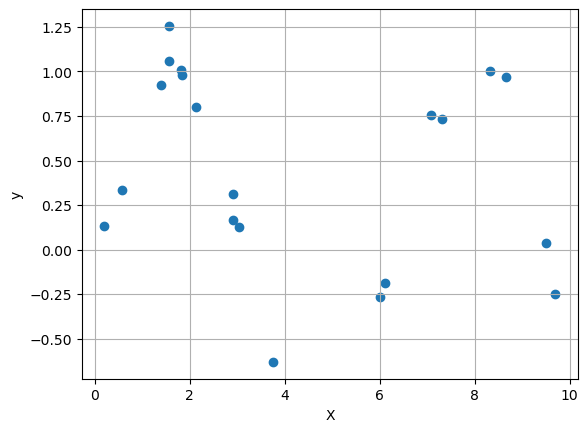

In [15]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 23
X_all = np.sort(np.random.rand(num_samples) * 10).reshape(-1, 1)
y_all = np.sin(X_all.reshape(-1)) + np.random.randn(num_samples) * 0.1

samp_idx = (X_all.reshape(-1) < 4) + (X_all.reshape(-1) > 6)
X = X_all[samp_idx]
y = y_all[samp_idx]
print(len(X))

# Plot the synthetic data
plt.scatter(X, y, label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

### k-fold Cross-Validation:

### <span style="color:red"> Task 1: Implement a k-fold cross-validation function as discussed in **Lecture 6** by filling in the parts of the code with TODOs. </span>


The metrics we would use will be MSE. We will use the libraries for the metrics directly from sklearn.

#### <span style="color:green">Total: 1 point</span> 

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error


def kfold_cross_validation(model, X: np.ndarray, y: np.ndarray, k: int = 5, random_seed: int = 42):
    """k-fold cross-validation for a selected model.

    Parameters:
    model: The model you want to evaluate.
    X: The input features (numpy array).
    y: The target variable (numpy array).
    k: Number of folds (default is 5).

    Returns:
    Average metrics across the K folds.
    """
    random.seed(a=random_seed)
    np.random.seed(random_seed)

    n_samples = len(X)
    assert n_samples % k == 0
    fold_size = n_samples // k  # TODO: calculate the foldsize
    indices = np.arange(n_samples)
    np.random.shuffle(indices) # shuffle the index order

    mses = []
    for i in range(k):
        # The idea is to choose the i_th fold as the test set
        # the i_th fold starts from i*fold_size, and ends with (i+1)*fold_size
        test_indices = indices[i * fold_size : (i + 1) * fold_size]  # TODO: pick out fold i
        # All the rest folds will be the training set 
        # Method: concatenate the i folds and k-i-1 fold
        train_indices = np.concatenate([
            indices[: i * fold_size], # the former part
            indices[(i +1) * fold_size :] # the latter part
        ])# TODO: the rest of the indices

        # split the data following the indecies 
        X_train, X_test = X[train_indices], X[test_indices] 
        y_train, y_test = y[train_indices], y[test_indices]

        #start training and predicting
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # TODO: add MSE to the list
        mse = mean_squared_error(y_test, y_pred)
        mses.append(mse)

    return np.mean(mses)

### Model Evaluation

### <span style="color:red">Task 2:  Fit polynomial models with different degrees on your training data with your written 5-fold cross validation function above by filling in the parts of the code with TODO.</span>

#### <span style="color:green">Total: 1 point </span> 


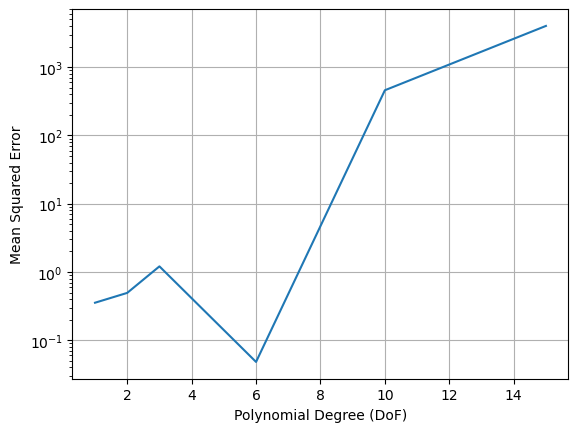

In [17]:
degrees_range = [1, 2, 3, 6, 10, 15]

kfold_mse = []

# Loop through different polynomial degrees
for degree in degrees_range:

    # Define the polynomial regression model
    poly_model = make_poly_model(degree=degree, reg="", lambd = 0)  # TODO: define the model without regularization -- leaving reg blank

    # set random seed to 42 (default) in k-fold
    # TODO: add k-fold CV mse to the list
    mse = kfold_cross_validation(poly_model, X, y, k = 5, random_seed=42)
    kfold_mse.append(mse)


# plot MSE-deg
plt.plot(degrees_range, kfold_mse)
plt.xlabel("Polynomial Degree (DoF)")
plt.ylabel("Mean Squared Error")
plt.yscale("log")
plt.grid(True)
plt.show()

### Evaluating with Varying K

### <span style="color:red">Task 3: Write a for loop over different values of k by completing the sections of the code with TODO.


#### <span style="color:green">Total: 1 point </span> 

In [ ]:
# Define the range of k values
k_values = [2, 5, 10, 20]

# Loop through different polynomial degrees
for degree in degrees_range:
    # TODO: define the mse list

    # Perform cross-validation for each value of k
    for k in k_values:
        # Define the polynomial regression model
        poly_model = TODO  # TODO: define the model without regularization

        # set random seed to 42 (default) in k-fold
        # TODO: add k-fold CV mse to the list

    # TODO: Plot the MSE of each model (in the same plot, not subplots)

# Show plot
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE vs. k")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

### <span style="color:red">Task 3.1: Based on the output of your code, which model is the best? Does the k value affect the selection of the models?


#### <span style="color:green">Total: 1 point </span> 

**TODO**: fill your answer here

## Part Two: Regularization and Model Selection, <span style="color:green">total of 6 points </span> 

In this section, we will fix the degree of the polynomial and explore different regularization methods, namely Lasso and Ridge, along with different tuning parameter.

### Regularization Terms

### <span style="color:red"> Task 4: Implement regularization terms as discussed in **Lecture 7** by filling in the parts of the code with TODOs. </span>


Here you should calculate the terms added to loss (with $\lambda$) from the parameters.

#### <span style="color:green">Total: 1 point</span> 

In [ ]:
def l1(model, lambd: float) -> float:
    # parameters in the linear regression
    betas = model.named_steps["linear"].coef_
    beta0 = model.named_steps["linear"].intercept_
    return TODO  # TODO: calculate for L1 term (for Lasso)


def l2(model, lambd: float) -> float:
    # parameters in the linear regression
    betas = model.named_steps["linear"].coef_
    beta0 = model.named_steps["linear"].intercept_
    return TODO  # TODO: calculate for L2 term (for Ridge)


# poly_model is carried from the previous task. It should be deterministic if you run all cell in order.
print("L1: ", l1(poly_model, 1))
print("L2: ", l2(poly_model, 1))

#### Lasso & Ridge Regression

### <span style="color:red">Task 5: Fill in the missing parts of the code to evaluate ridge and lasso regression using different lambda values. Use the 10-fold CV implemented above </span>

#### <span style="color:green">Total: 1 point </span> 

In [ ]:
lambda_values = np.concat([np.logspace(-6, 6, 13)])
mse_lasso = []
mse_ridge = []
degree = 10

# Loop through different polynomial degrees
for lambd in lambda_values:

    # Define the polynomial regression model
    lasso = TODO
    ridge = TODO  # TODO: define the two models with Lasso and Ridge respectively

    # set random seed to 42 (default) in k-fold
    # TODO: add the k-fold CV mse to respective list


# plot MSE-deg
plt.plot(lambda_values, mse_lasso, label="Lasso")
plt.plot(lambda_values, mse_ridge, label="Ridge")
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

# print min
print(f"Best lambda for Lasso {TODO}")
print(f"Best lambda for Ridge {TODO}")  # TODO: find the best lambda for both

### <span style="color:red">Task 5.1: Based on the output of your code, which regularization is the better? And what is the optimal lambda?


#### <span style="color:green">Total: 1 point </span> 

### <span style="color:red">Task 6: Choose the model of with the best regularization you found above by filling in the TODO, and run the visualization. </span>

#### <span style="color:green">Total: 0.5 point </span> 

In [ ]:
X_plot = np.linspace(X_all.min(), X_all.max(), 100).reshape(-1, 1)
degree = 10


model = TODO  # TODO: define the model without regularization
reg_model = TODO  # TODO: define the model with the best regularization you found


model.fit(X, y)
reg_model.fit(X, y)


pred = model.predict(X)
reg_pred = reg_model.predict(X)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Data")
plt.plot(X_plot, model.predict(X_plot), label=f"W/o regularizaion, MSE={TODO}")  # TODO: calc the MSE of both predictions
plt.plot(X_plot, reg_model.predict(X_plot), label=f"W/ regularizaion, MSE={TODO}")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Predictions on data in CV")
plt.legend(loc="lower right")
plt.ylim(-1.6, 1.3)
plt.grid(True)


pred = model.predict(X_all)
reg_pred = reg_model.predict(X_all)

plt.subplot(1, 2, 2)
plt.scatter(X_all, y_all, label="Data")
plt.plot(X_plot, model.predict(X_plot), label=f"W/o regularizaion, MSE={TODO}")  # TODO: calc the MSE of both predictions
plt.plot(X_plot, reg_model.predict(X_plot), label=f"W/ regularizaion, MSE={TODO}")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Predictions on data unseen from CV")
plt.legend(loc="lower right")
plt.ylim(-1.6, 1.3)
plt.grid(True)
plt.show()

### <span style="color:red">Task 6.1: Look at the plots above. Does regularization seem to be helpful in each graph? Explain why there's difference.


#### <span style="color:green">Total: 2.5 points </span> 

<p style="text-align: center;">


## That is it for this assignment, we do hope you learn something from this exercise!
</p>